In [1]:
!pip install opencv-python

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as linalg
import utils
import w4_unittest

In [4]:
# Define a transition probability matrix P
P = np.array([ 
    [0, 0.75, 0.35, 0.25, 0.85], 
    [0.15, 0, 0.35, 0.25, 0.05], 
    [0.15, 0.15, 0, 0.25, 0.05], 
    [0.15, 0.05, 0.05, 0, 0.05], 
    [0.55, 0.05, 0.25, 0.25, 0]  
])

In [5]:
# Initial state vector X0
X0 = np.array([[0],[0],[0],[1],[0]])

# Perform matrix multiplication to get the next state
X1 = np.dot(P, X0)

print(f'Sum of columns of P: {np.sum(P, axis=0)}')
print(f'X1:\n{X1}')

Sum of columns of P: [1. 1. 1. 1. 1.]
X1:
[[0.25]
 [0.25]
 [0.25]
 [0.  ]
 [0.25]]


In [6]:
# Iteratively apply the matrix P to X for m steps
X = np.array([[0],[0],[0],[1],[0]])
m = 20
for t in range(m):
    X = np.dot(P, X)

print(f'Final state after {m} steps:\n{X}')

Final state after 20 steps:
[[0.39392366]
 [0.13392366]
 [0.11407667]
 [0.0850993 ]
 [0.27297672]]


In [7]:
# Compute eigenvalues and eigenvectors of matrix P
eigenvals, eigenvecs = np.linalg.eig(P)
print(f'Eigenvalues of P:\n{eigenvals}\n\nEigenvectors of P:\n{eigenvecs}')

Eigenvalues of P:
[ 1.         -0.70367062  0.00539505 -0.08267227 -0.21905217]

Eigenvectors of P:
[[-0.76088562 -0.81362074  0.10935376  0.14270615 -0.39408574]
 [-0.25879453  0.050269   -0.6653158   0.67528802 -0.66465044]
 [-0.2204546   0.07869601 -0.29090665  0.17007443  0.35048734]
 [-0.1644783   0.12446953  0.19740707 -0.43678067  0.23311487]
 [-0.52766004  0.56018621  0.64946163 -0.55128793  0.47513398]]


In [8]:
# Extract the eigenvector corresponding to the eigenvalue 1
X_inf = eigenvecs[:, np.argmax(eigenvals)]

print(f"Eigenvector corresponding to the eigenvalue 1:\n{X_inf[:, np.newaxis]}")


Eigenvector corresponding to the eigenvalue 1:
[[-0.76088562]
 [-0.25879453]
 [-0.2204546 ]
 [-0.1644783 ]
 [-0.52766004]]


In [9]:
# Function to check if the eigenvector is correctly computed
def check_eigenvector(P, X_inf):
    """
    Check if P * X_inf equals X_inf
    Args:
        P (ndarray): Transition matrix
        X_inf (ndarray): Eigenvector
    Returns:
        X_check (ndarray): Result of P * X_inf
    """
    X_check = np.dot(P, X_inf)
    return X_check

X_check = check_eigenvector(P, X_inf)
print("Original eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))
print("Result of multiplication:\n" + str(X_check))


Original eigenvector corresponding to the eigenvalue 1:
[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]
Result of multiplication:
[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]


In [10]:
# Check if the computed eigenvector is close to the result of multiplication
print("Check that PX = X element by element:" + str(np.allclose(X_inf, X_check, rtol=1e-10)))


Check that PX = X element by element:True


In [11]:
# Normalize the eigenvector to get long-run probabilities
X_inf = X_inf / np.sum(X_inf)
print(f"Long-run probabilities of being at each webpage:\n{X_inf[:, np.newaxis]}")


Long-run probabilities of being at each webpage:
[[0.39377747]
 [0.13393269]
 [0.11409081]
 [0.08512166]
 [0.27307736]]


In [12]:
# Load images from the specified directory
imgs = utils.load_images('./data/')
height, width = imgs[0].shape

print(f'\nYour dataset has {len(imgs)} images of size {height}x{width} pixels\n')



Your dataset has 55 images of size 64x64 pixels



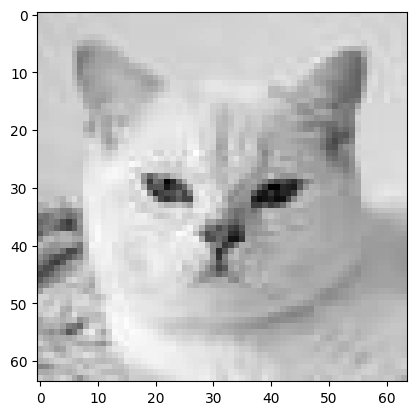

In [13]:
# Display the first image
plt.imshow(imgs[0], cmap='gray')
plt.show()

In [14]:
# Flatten the images for PCA
imgs_flatten = np.array([im.reshape(-1) for im in imgs])
print(f'imgs_flatten shape: {imgs_flatten.shape}')


imgs_flatten shape: (55, 4096)


In [15]:
# Function to center data (subtract mean of each column)
def center_data(Y):
    """
    Center the data by subtracting the mean of each feature.
    Args:
        Y (ndarray): Input data matrix (n_observations x n_pixels)
    Returns:
        X (ndarray): Centered data
    """
    column_means = np.mean(Y, axis=0)
    X = Y - column_means
    return X

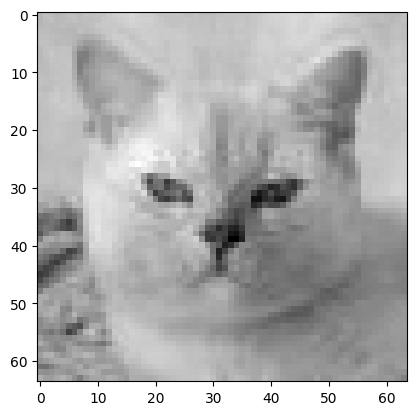

In [18]:
# Center the flattened images
X = center_data(imgs_flatten)
plt.imshow(X[0].reshape(64, 64), cmap='gray')
plt.show()


In [17]:
# Function to calculate the covariance matrix
def get_cov_matrix(X):
    """
    Calculate the covariance matrix of the centered data.
    Args:
        X (ndarray): Centered data matrix
    Returns:
        cov_matrix (ndarray): Covariance matrix
    """
    cov_matrix = np.dot(X.T, X) / (X.shape[0] - 1)
    return cov_matrix


In [19]:
# Compute the covariance matrix
cov_matrix = get_cov_matrix(X)
print(f'Covariance matrix shape: {cov_matrix.shape}')

Covariance matrix shape: (4096, 4096)


In [20]:
# Perform eigenvalue decomposition on the covariance matrix
np.random.seed(50)
eigenvals, eigenvecs = linalg.eigsh(cov_matrix, k=55)
eigenvals = eigenvals[::-1]  # Reverse order for largest eigenvalues first
eigenvecs = eigenvecs[:, ::-1]  # Reverse order for corresponding eigenvectors

print(f'Ten largest eigenvalues: \n{eigenvals[:10]}')


Ten largest eigenvalues: 
[4199357.2773408  2483710.87630304 1536617.26289103 1011093.05519076
  878711.73402995  839689.08870292  479311.0892984   399184.59618649
  383726.58867454  293228.19669624]


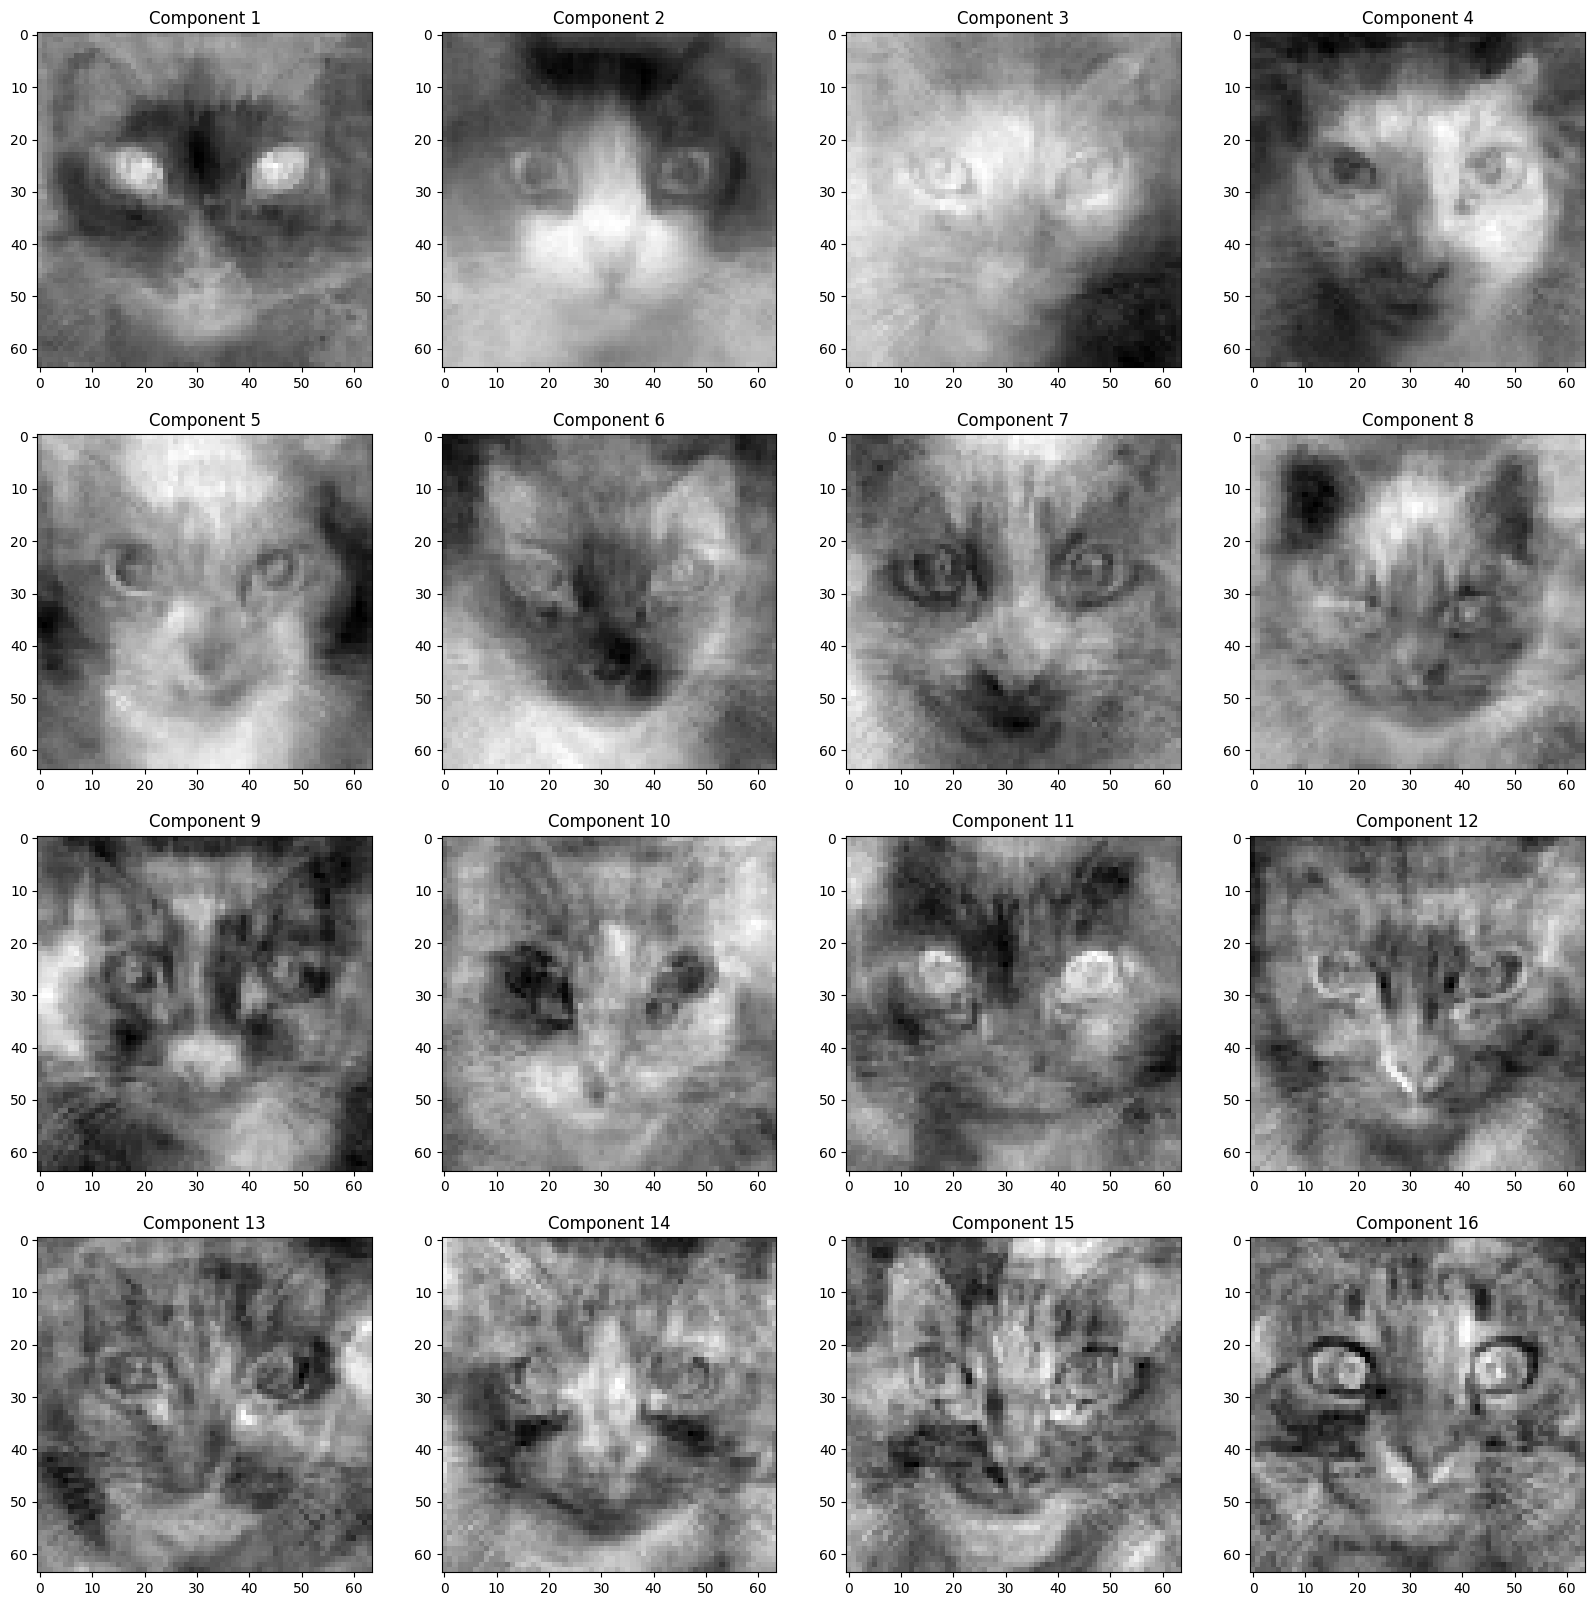

In [21]:
# Display the first 16 principal components as images
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for n in range(4):
    for k in range(4):
        ax[n, k].imshow(eigenvecs[:, n * 4 + k].reshape(height, width), cmap='gray')
        ax[n, k].set_title(f'Component {n * 4 + k + 1}')
plt.show()


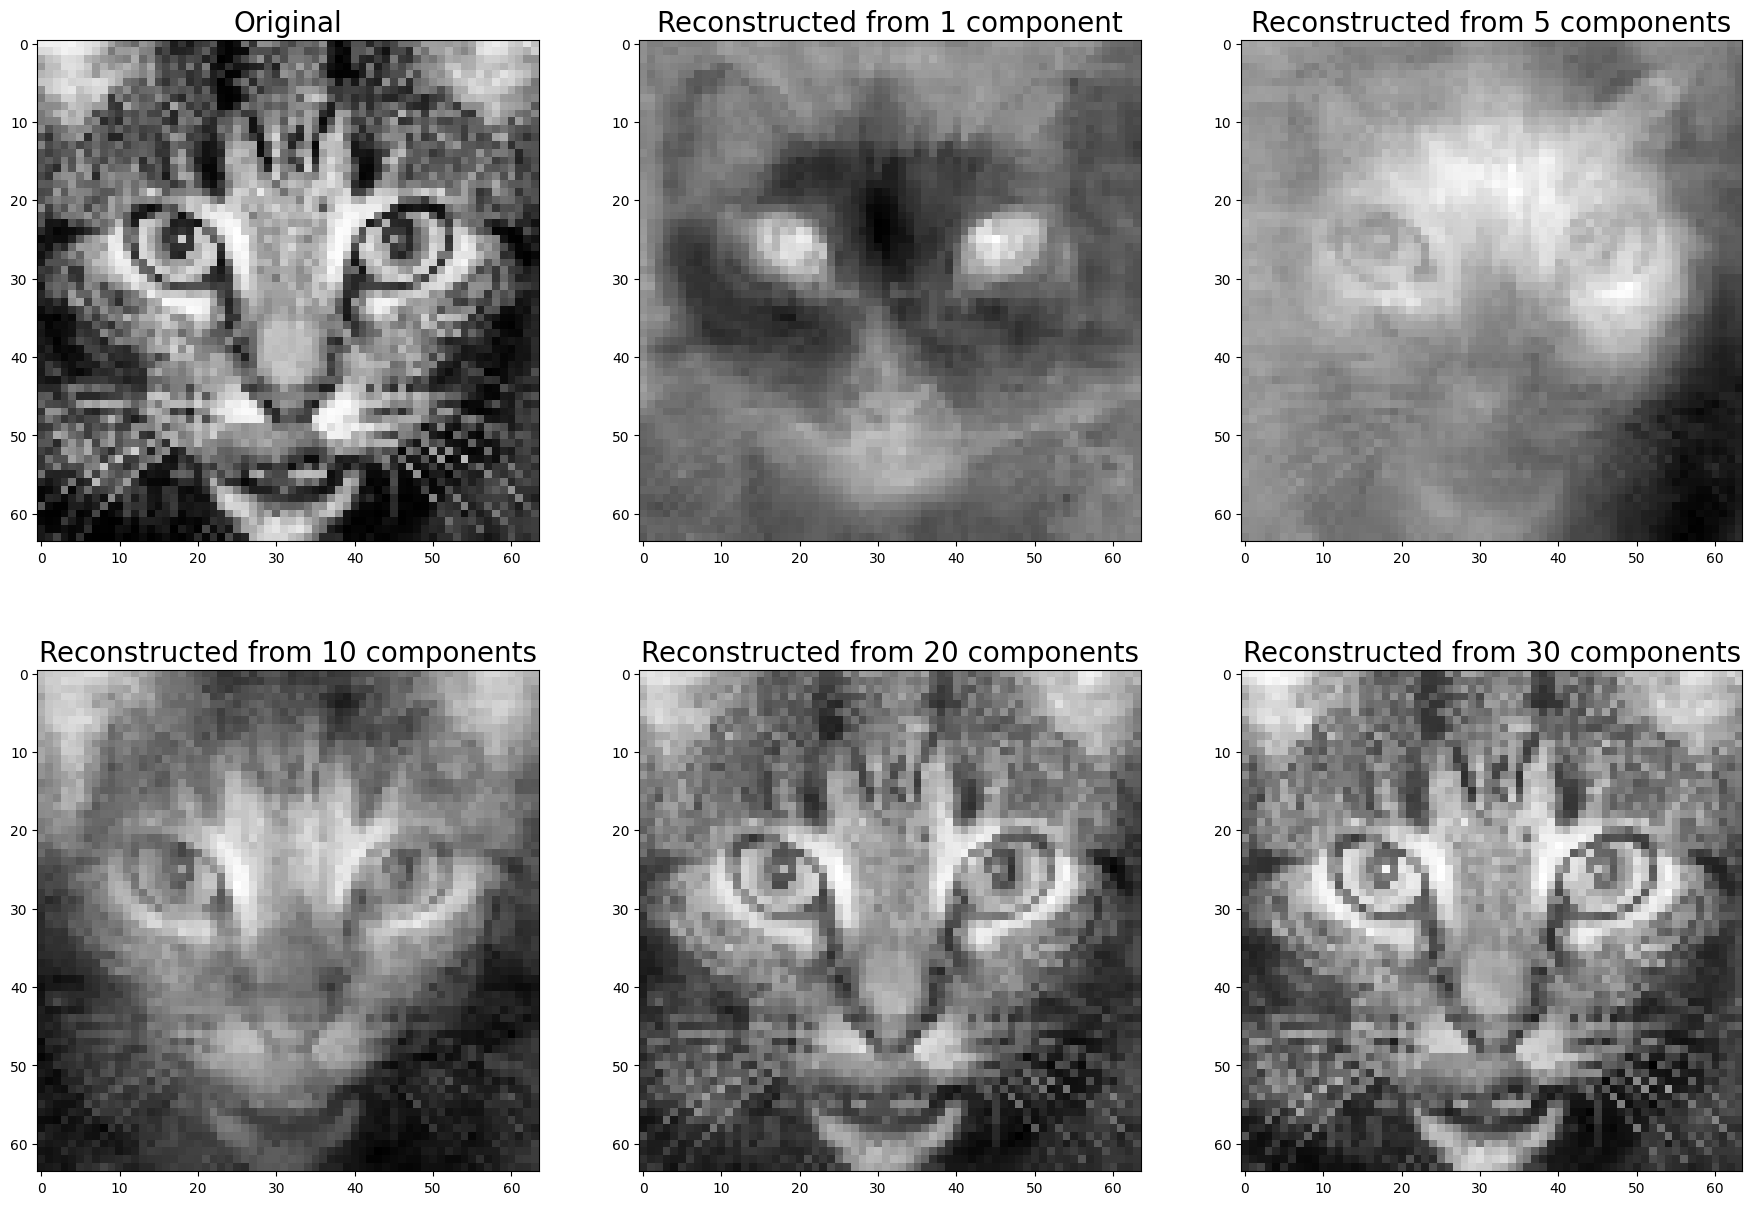

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform PCA
def perform_PCA(X, eigenvecs, k):
    """
    Perform dimensionality reduction with PCA
    Args:
        X (ndarray): Original data matrix with dimensions (n_observations, n_variables)
        eigenvecs (ndarray): Matrix of eigenvectors. Each column is one eigenvector. The k-th eigenvector 
                             is associated with the k-th eigenvalue
        k (int): Number of principal components to use
    Returns:
        Xred (ndarray): Reduced data matrix with dimensions (n_observations, k)
    """
    V = eigenvecs[:, :k]  # Select the first k eigenvectors
    Xred = np.dot(X, V)   # Project the data onto the selected eigenvectors
    return Xred

# Function to reconstruct the images from reduced dimensionality
def reconstruct_image(Xred, eigenvecs):
    """
    Reconstruct the image from reduced dimensionality data.
    Args:
        Xred (ndarray): Reduced data matrix
        eigenvecs (ndarray): Matrix of eigenvectors
    Returns:
        Xrec (ndarray): Reconstructed data matrix
    """
    return np.dot(Xred, eigenvecs[:, :Xred.shape[1]].T)

# Reconstruct images from different numbers of principal components
Xrec1 = reconstruct_image(perform_PCA(X, eigenvecs, 1), eigenvecs)
Xrec5 = reconstruct_image(perform_PCA(X, eigenvecs, 5), eigenvecs)
Xrec10 = reconstruct_image(perform_PCA(X, eigenvecs, 10), eigenvecs)
Xrec20 = reconstruct_image(perform_PCA(X, eigenvecs, 20), eigenvecs)
Xrec30 = reconstruct_image(perform_PCA(X, eigenvecs, 30), eigenvecs)

# Display original and reconstructed images
fig, ax = plt.subplots(2, 3, figsize=(22, 15))
ax[0, 0].imshow(imgs[21], cmap='gray')
ax[0, 0].set_title('Original', size=20)
ax[0, 1].imshow(Xrec1[21].reshape(height, width), cmap='gray')
ax[0, 1].set_title('Reconstructed from 1 component', size=20)
ax[0, 2].imshow(Xrec5[21].reshape(height, width), cmap='gray')
ax[0, 2].set_title('Reconstructed from 5 components', size=20)
ax[1, 0].imshow(Xrec10[21].reshape(height, width), cmap='gray')
ax[1, 0].set_title('Reconstructed from 10 components', size=20)
ax[1, 1].imshow(Xrec20[21].reshape(height, width), cmap='gray')
ax[1, 1].set_title('Reconstructed from 20 components', size=20)
ax[1, 2].imshow(Xrec30[21].reshape(height, width), cmap='gray')
ax[1, 2].set_title('Reconstructed from 30 components', size=20)
plt.show()


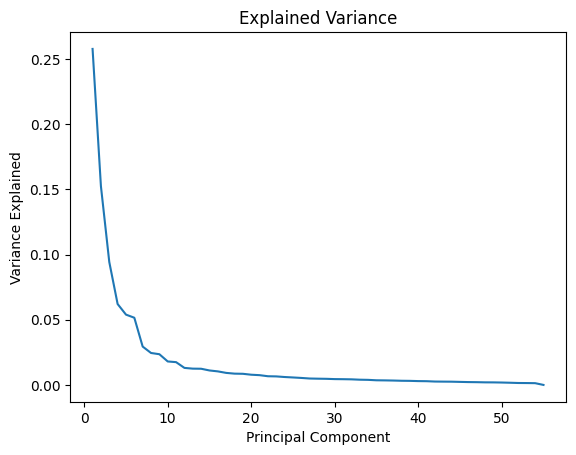

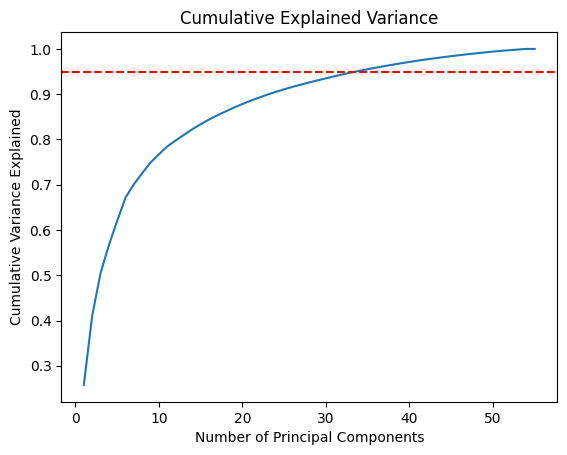

In [27]:
# Plot the explained variance and cumulative explained variance
explained_variance = eigenvals / np.sum(eigenvals)
plt.plot(np.arange(1, 56), explained_variance)
plt.title('Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

explained_cum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, 56), explained_cum_variance)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()


In [28]:
# Reduce the data to 35 principal components and reconstruct images
Xred35 = perform_PCA(X, eigenvecs, 35)
Xrec35 = reconstruct_image(Xred35, eigenvecs)


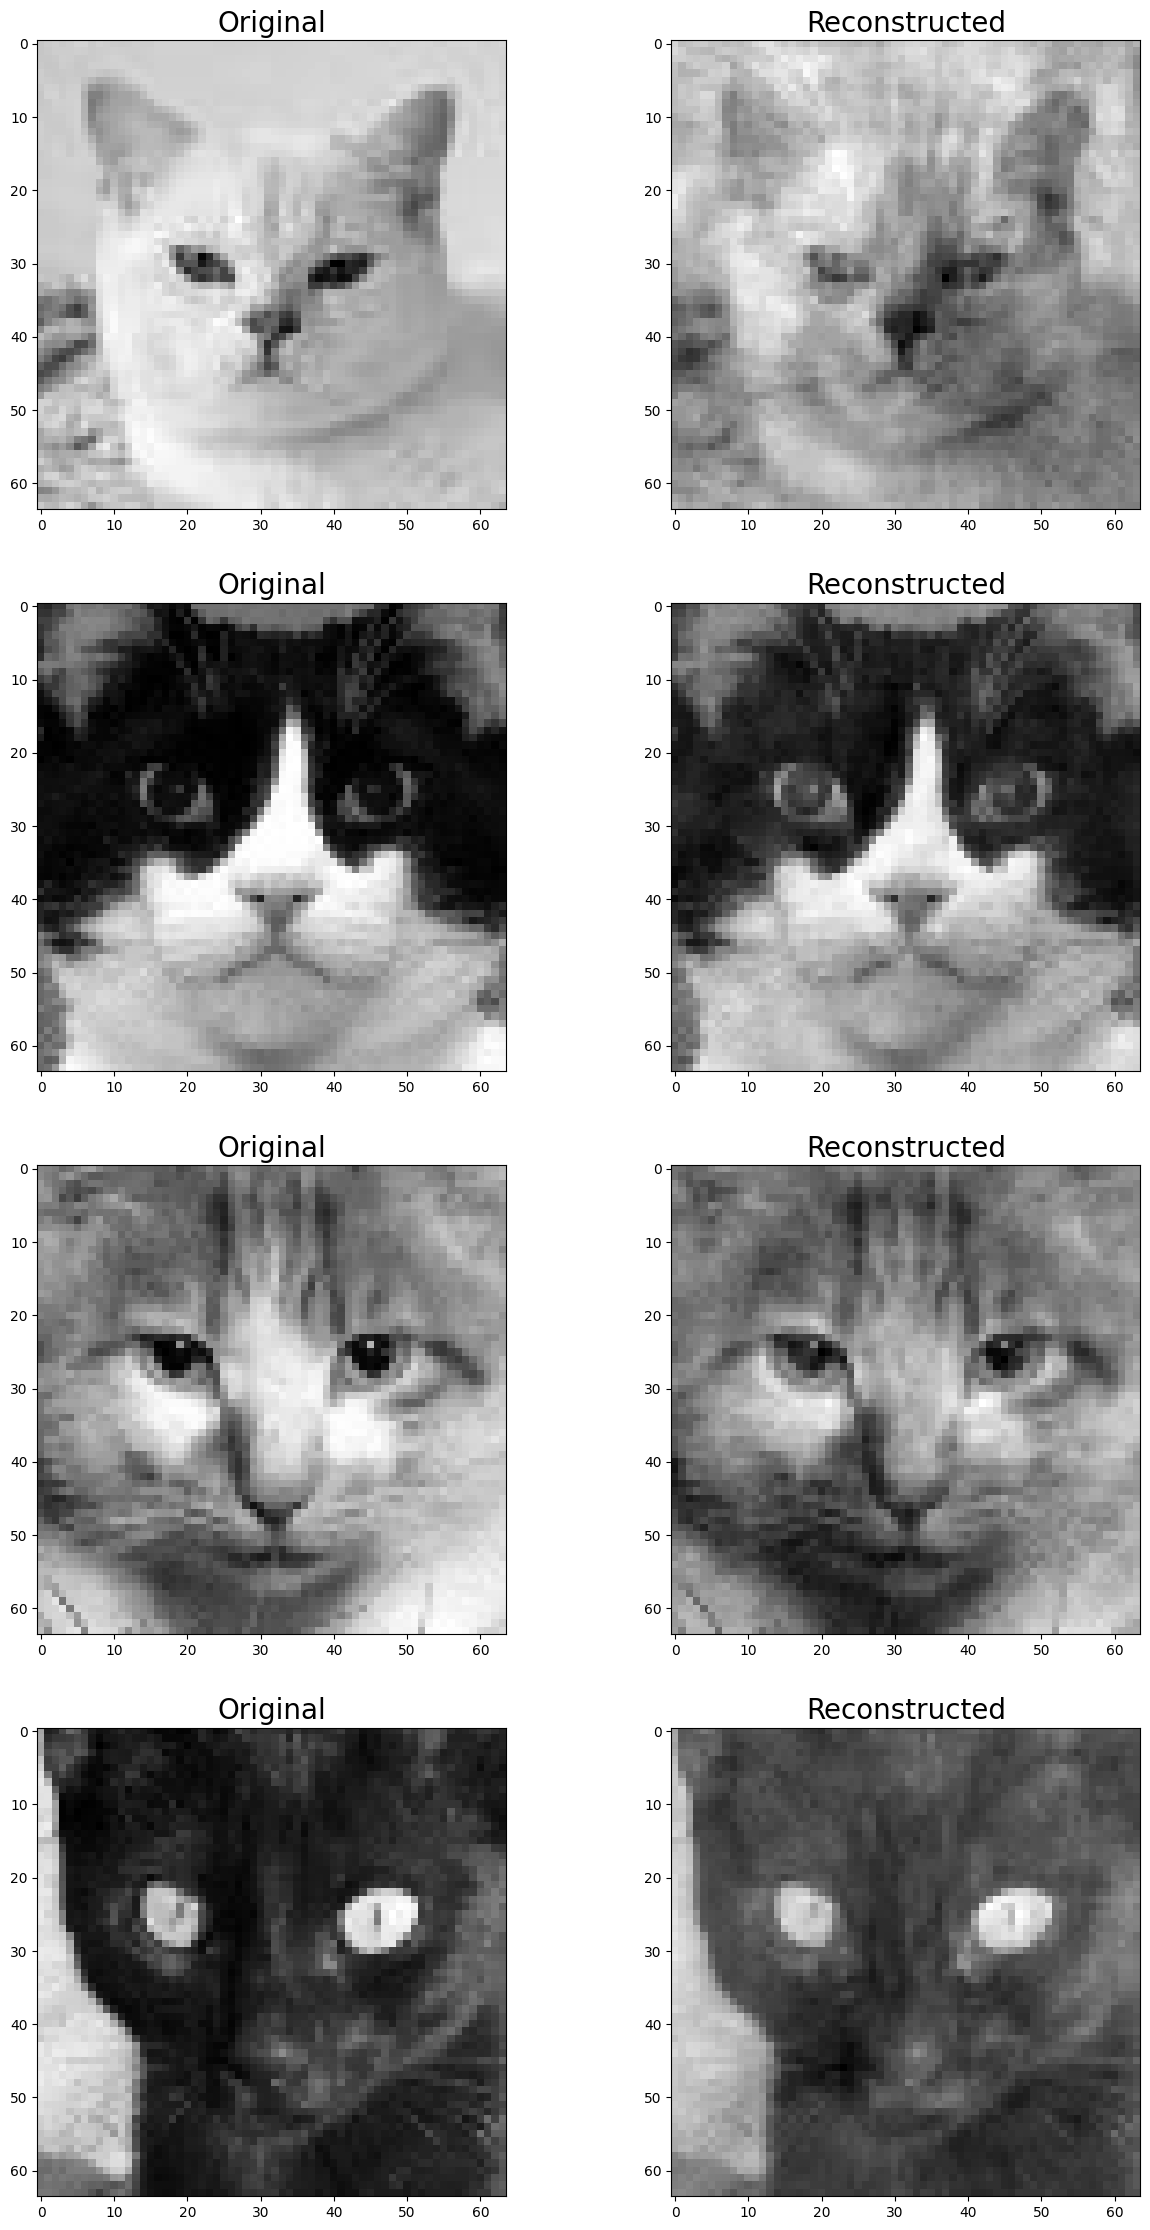

In [29]:
# Display original and reconstructed images for 35 components
fig, ax = plt.subplots(4, 2, figsize=(15, 28))
ax[0, 0].imshow(imgs[0], cmap='gray')
ax[0, 0].set_title('Original', size=20)
ax[0, 1].imshow(Xrec35[0].reshape(height, width), cmap='gray')
ax[0, 1].set_title('Reconstructed', size=20)

ax[1, 0].imshow(imgs[15], cmap='gray')
ax[1, 0].set_title('Original', size=20)
ax[1, 1].imshow(Xrec35[15].reshape(height, width), cmap='gray')
ax[1, 1].set_title('Reconstructed', size=20)

ax[2, 0].imshow(imgs[22], cmap='gray')
ax[2, 0].set_title('Original', size=20)
ax[2, 1].imshow(Xrec35[22].reshape(height, width), cmap='gray')
ax[2, 1].set_title('Reconstructed', size=20)

ax[3, 0].imshow(imgs[33], cmap='gray')
ax[3, 0].set_title('Original', size=20)
ax[3, 1].imshow(Xrec35[33].reshape(height, width), cmap='gray')
ax[3, 1].set_title('Reconstructed', size=20)

plt.show()